In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
import pandas as pd
main_df=pd.read_csv('/content/drive/MyDrive/masterdataframe.csv')

In [92]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Columns: 530 entries, date to precomp_recent_avg_ground_strikes_attempts_per_min
dtypes: float64(491), int64(25), object(14)
memory usage: 53.9+ MB


In [93]:
main_df.describe()

,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
count,13322.000000,13322.000000,13322.000000,12039.000000,13308.000000,13087.000000,13322.000000,13322.000000,13322.000000,13322.000000,...,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000
mean,0.491142,628.426813,2.330431,72.136307,70.383228,37.109345,0.215283,0.402792,0.136991,131.914953,...,0.809267,0.833145,0.909553,0.976845,0.802686,0.858894,1.295839,1.390631,1.127832,1.206472
std,0.499940,365.103370,1.013957,4.176705,3.482012,6.217236,0.493830,0.852478,0.423131,174.784787,...,0.954325,0.972702,1.587399,1.687217,1.220934,1.273812,2.073595,2.196934,1.617614,1.683694
min,0.000000,5.000000,1.000000,58.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.000000,1.000000,70.000000,68.000000,33.000000,0.000000,0.000000,0.000000,5.000000,...,0.284096,0.288889,0.200000,0.233333,0.142540,0.167901,0.300000,0.345762,0.214003,0.244444
50%,0.000000,794.000000,3.000000,72.000000,71.000000,37.000000,0.000000,0.000000,0.000000,57.000000,...,0.568116,0.587569,0.535997,0.592045,0.422222,0.466667,0.796219,0.867907,0.618557,0.668380
75%,1.000000,900.000000,3.000000,75.000000,73.000000,41.000000,0.000000,1.000000,0.000000,195.000000,...,1.017945,1.045211,1.078072,1.153730,0.978280,1.047863,1.570326,1.679185,1.394168,1.510555
max,1.000000,2160.000000,5.000000,84.000000,83.000000,79.000000,5.000000,10.000000,5.000000,1342.000000,...,16.196825,16.196825,48.000000,48.000000,16.170940,16.170940,51.428571,51.428571,23.593461,23.593461


# **FRACTION OF FIGHTS PER DIVISION**

In [94]:
main_df.division.value_counts()//2

division
Lightweight              1181
Welterweight             1162
Middleweight              897
Heavyweight               633
Featherweight             626
Light Heavyweight         611
Bantamweight              549
Flyweight                 262
Women's Strawweight       235
Women's Bantamweight      169
Women's Flyweight         165
Open Weight               102
Catch Weight               45
Women's Featherweight      23
Super Heavyweight           1
Name: count, dtype: int64

# **NUMBER OF MATCHES IN WOMEN'S DIVISION AND ITS DISTRIBUTION ACROSS THE YEARS**

In [8]:
women_count = main_df[main_df['division'].str.contains('women', case=False, regex=True)].shape[0]

print("Number of rows with 'women' in the 'division' column:", women_count/2)

Number of rows with 'women' in the 'division' column: 592.0


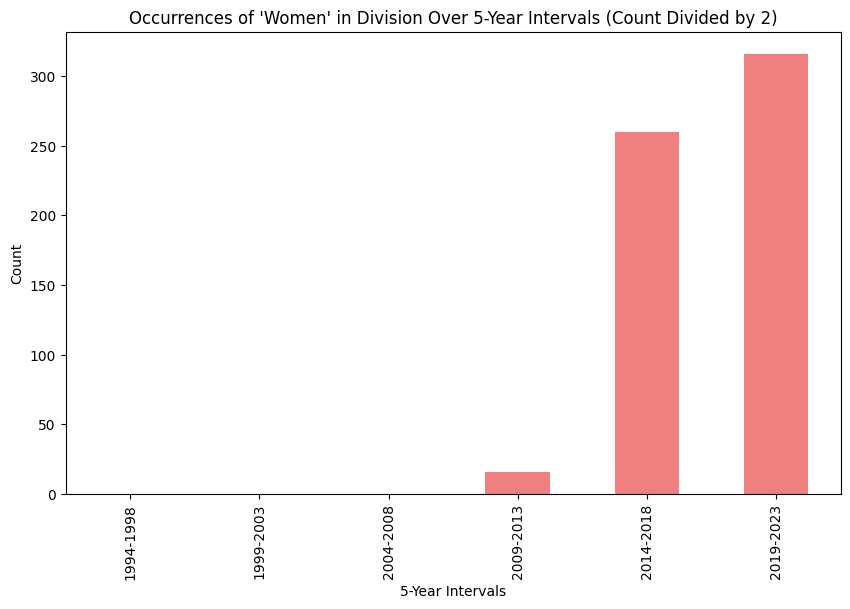

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df_analysis = main_df.copy()

df_analysis['date'] = pd.to_datetime(df_analysis['date'], errors='coerce')
df_analysis['year'] = df_analysis['date'].dt.year

bins = range(df_analysis['year'].min(), df_analysis['year'].max() + 6, 5)
df_analysis['year_interval'] = pd.cut(df_analysis['year'], bins, right=False, labels=[f"{i}-{i+4}" for i in bins[:-1]])

women_count_by_year = df_analysis[df_analysis['division'].str.contains('women', case=False, regex=True)].groupby('year_interval').size()

women_count_by_year /= 2

plt.figure(figsize=(10, 6))
women_count_by_year.plot(kind='bar', color='lightcoral')
plt.title("Occurrences of 'Women' in Division Over 5-Year Intervals (Count Divided by 2)")
plt.xlabel("5-Year Intervals")
plt.ylabel("Count")
plt.show()


# **DISTRIBUTION OF FIGHTS ACROSS THE YEARS FOR DIFFERENT GENDERS (MALE AND FEMALE)**

<Figure size 1000x600 with 0 Axes>

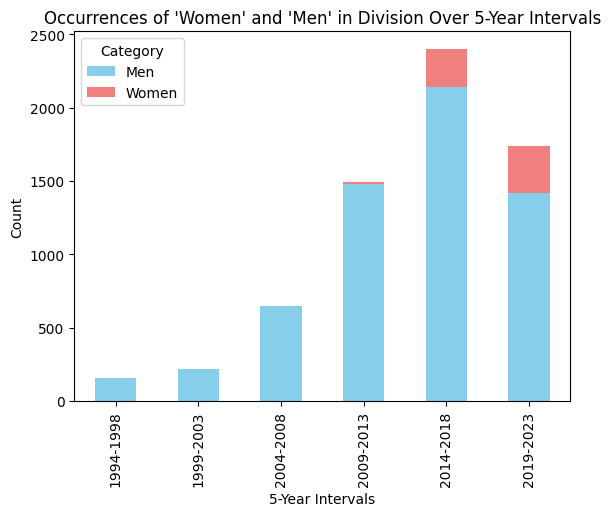

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



df_analysis = main_df.copy()

df_analysis['date'] = pd.to_datetime(df_analysis['date'], errors='coerce')
df_analysis['year'] = df_analysis['date'].dt.year

bins = range(df_analysis['year'].min(), df_analysis['year'].max() + 6, 5)
df_analysis['year_interval'] = pd.cut(df_analysis['year'], bins, right=False, labels=[f"{i}-{i+4}" for i in bins[:-1]])

df_analysis['category'] = df_analysis['division'].apply(lambda x: 'Women' if 'women' in x.lower() else 'Non-Women')

category_count_by_year = df_analysis.groupby(['year_interval', 'category']).size().unstack(fill_value=0)

category_count_by_year //= 2

plt.figure(figsize=(10, 6))
category_count_by_year.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title("Occurrences of 'Women' and 'Men' in Division Over 5-Year Intervals")
plt.xlabel("5-Year Intervals")
plt.ylabel("Count")
plt.legend(title='Category', loc='upper left', labels=['Men', 'Women'])
plt.show()


# **DISTRIBUTION OF DECISION METHOD FOR FIGHT RESULTS (ALONG DIVISIONS)**

In [11]:
import pandas as pd



filtered_df = main_df[main_df['method'].isin(['KO/TKO', 'SUB'])]

temp_list = []
result_df = pd.DataFrame()


for division in filtered_df['division'].unique():

    gender_category = 'Men' if 'Women' not in division else 'Women'


    division_data = filtered_df[filtered_df['division'] == division]


    counts = division_data['method'].value_counts()//2

    temp_dict = {
      'division': division,
      'gender': gender_category,
      'KO/TKO': counts.get('KO/TKO', 0),
      'SUB': counts.get('SUB', 0)
    }
    temp_list.append(temp_dict)
result_df = pd.DataFrame(temp_list)
print(result_df)



                 division gender  KO/TKO  SUB
0             Open Weight    Men      45   47
1             Lightweight    Men     329  271
2             Heavyweight    Men     341   96
3            Middleweight    Men     333  199
4            Welterweight    Men     377  216
5       Super Heavyweight    Men       1    0
6       Light Heavyweight    Men     266  104
7            Catch Weight    Men      13   11
8           Featherweight    Men     165  101
9            Bantamweight    Men     156  114
10              Flyweight    Men      59   50
11   Women's Bantamweight  Women      42   24
12    Women's Strawweight  Women      28   48
13      Women's Flyweight  Women      31   36
14  Women's Featherweight  Women       7    5


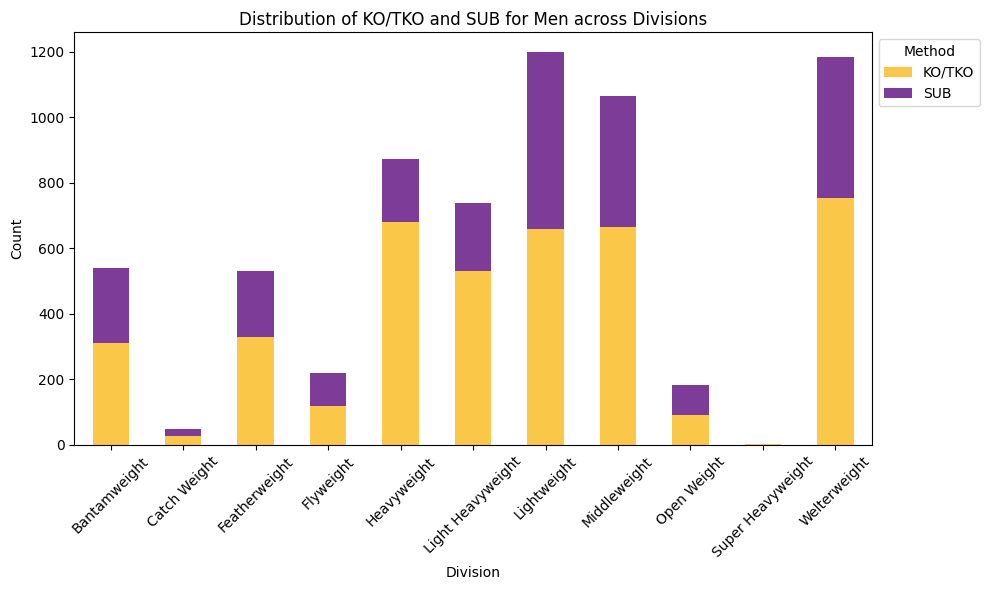

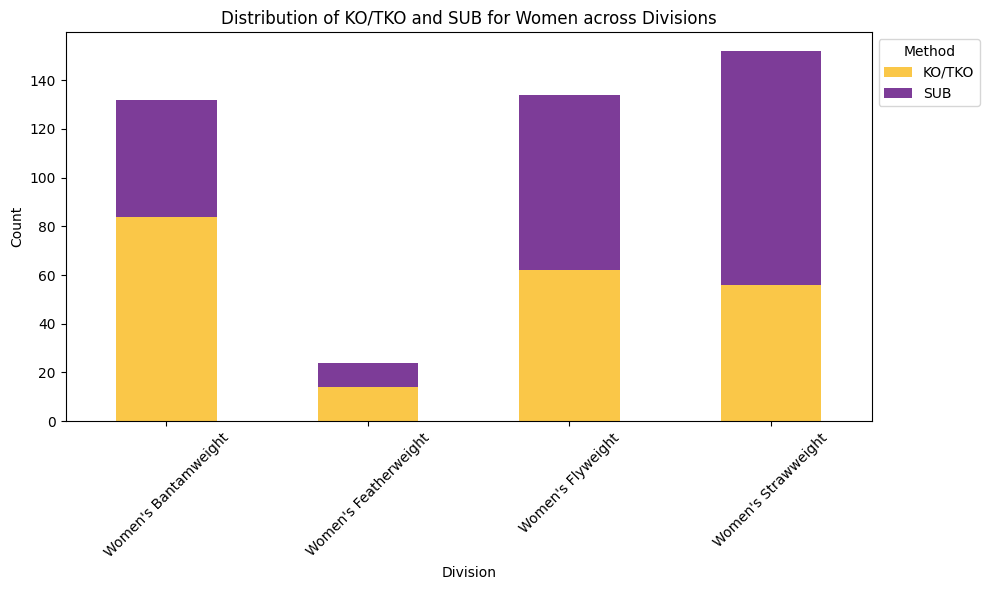

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = main_df[main_df['method'].isin(['KO/TKO', 'SUB'])]


result_df = pd.DataFrame()

temp_df_list = []
for division in filtered_df['division'].unique():

    gender_category = 'Men' if 'Women' not in division else 'Women'


    division_data = filtered_df[filtered_df['division'] == division]


    counts = division_data['method'].value_counts()

    temp_df = pd.DataFrame({
      'division': division,
      'gender': gender_category,
      'KO/TKO': counts.get('KO/TKO', 0),
      'SUB': counts.get('SUB', 0)
      }, index=[0])
    temp_df_list.append(temp_df)
result_df = pd.concat(temp_df_list, ignore_index=True)
custom_palette = sns.color_palette(['#FAC748', '#7D3C98'])
sns.set_palette(custom_palette)


# Plot for Men
men_df = result_df[result_df['gender'] == 'Men']
fig, ax1 = plt.subplots(figsize=(10, 6))
men_df.groupby('division').sum().plot(kind='bar', stacked=True, ax=ax1, color =custom_palette )
plt.title('Distribution of KO/TKO and SUB for Men across Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#Plot for Women
women_df = result_df[result_df['gender'] == 'Women']
fig, ax2 = plt.subplots(figsize=(10, 6))
women_df.groupby('division').sum().plot(kind='bar', stacked=True, ax=ax2)
plt.title('Distribution of KO/TKO and SUB for Women across Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# **Duration of the match vs the method of ending**

In [13]:
filtered_df = df_analysis[df_analysis['method'].isin(['KO/TKO', 'SUB'])]
df1 = filtered_df.groupby('year')['method'].value_counts(normalize=True)/2

In [14]:
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

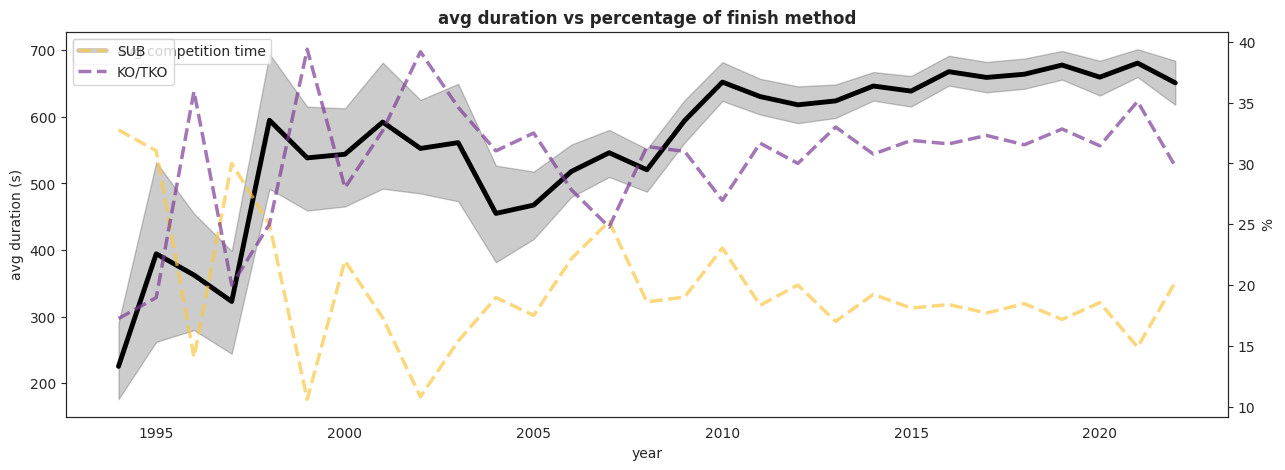

In [15]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,5))
g = sns.lineplot(x="year", y="total_comp_time", data=df_analysis, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="method",data=df1,  markers=True, dashes=False, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--')
g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='avg duration (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()


# **Distribution of number of fights across age**

In [16]:
age_data=main_df.copy()

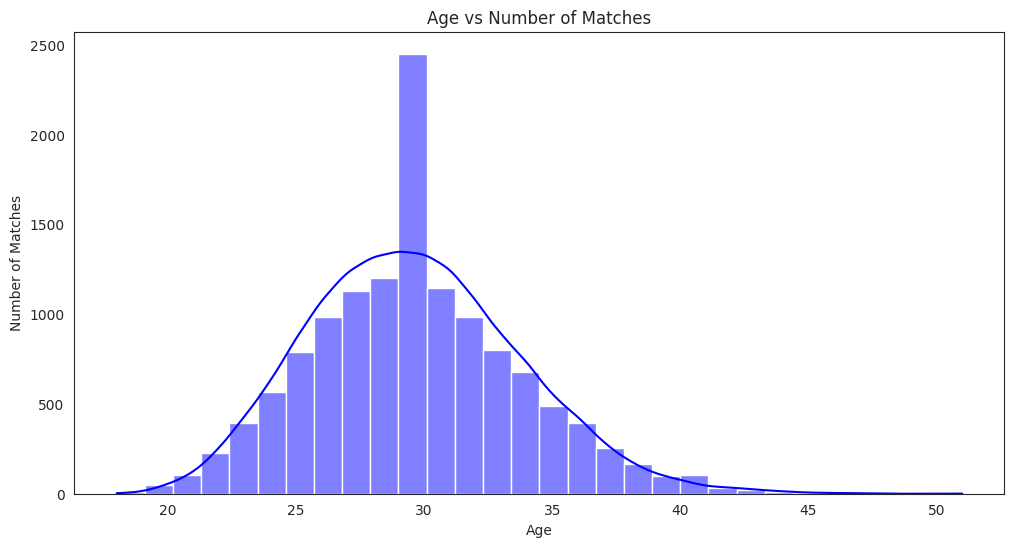

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_data['dob'] = pd.to_datetime(age_data['dob'])
age_data['date'] = pd.to_datetime(age_data['date'])

age_data['age'] = (age_data['date'] - age_data['dob']).dt.days // 365

result_counts = age_data.groupby('age')['result'].count().reset_index()

# Plot histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(age_data['age'], kde=True, color='blue', bins=30)
plt.title('Age vs Number of Matches')
plt.xlabel('Age')
plt.ylabel('Number of Matches')
plt.show()


# **DISTRIBUTION OF FIGHTS ACROSS THE DIVSION FOR DIFFRENT GENDERS**

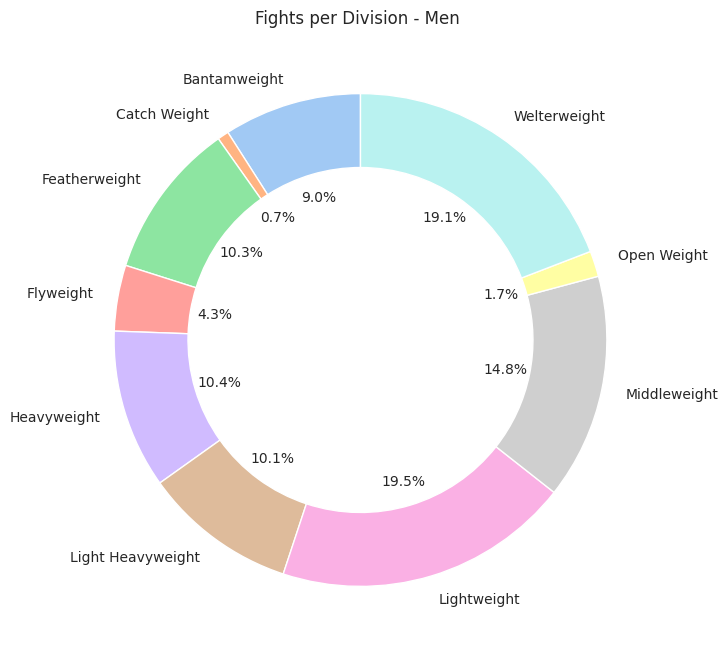

In [18]:
# Ignoring the Super Heavyweight because of its negligible contribution

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_data['category'] = age_data['division'].apply(lambda x: 'Women' if 'women' in x.lower() else 'Men')

division_counts = age_data.groupby(['category', 'division']).size().reset_index(name='fight_count')

men_data = division_counts[division_counts['category'] == 'Men']
women_data = division_counts[division_counts['category'] == 'Women']

men_data = men_data[men_data['division'] != 'Super Heavyweight']

plt.figure(figsize=(8, 8))
plt.pie(men_data['fight_count'], labels=men_data['division'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Fights per Division - Men ')
plt.show()

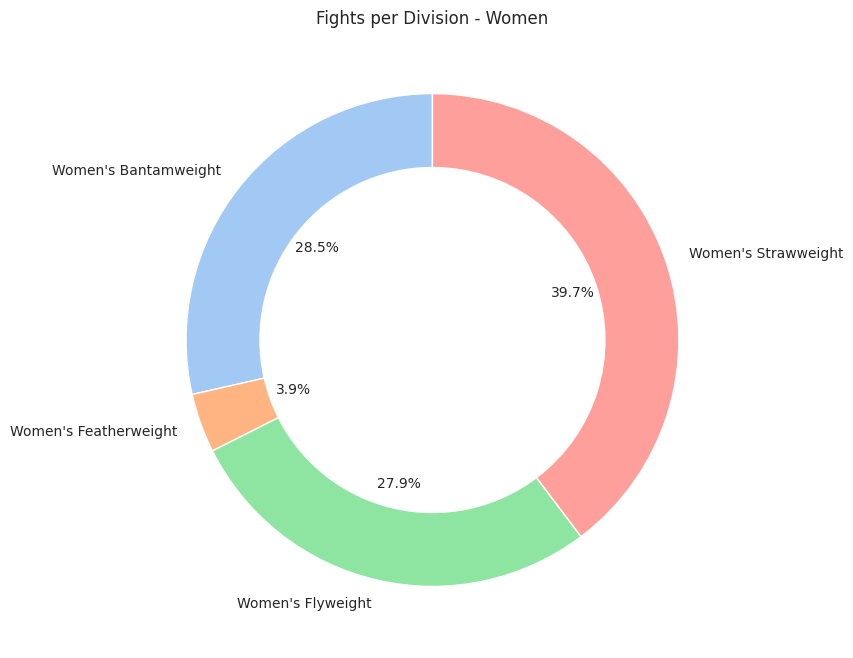

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(women_data['fight_count'], labels=women_data['division'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Fights per Division - Women')
plt.show()


# **Average Time for KO/TKO in Each Division**

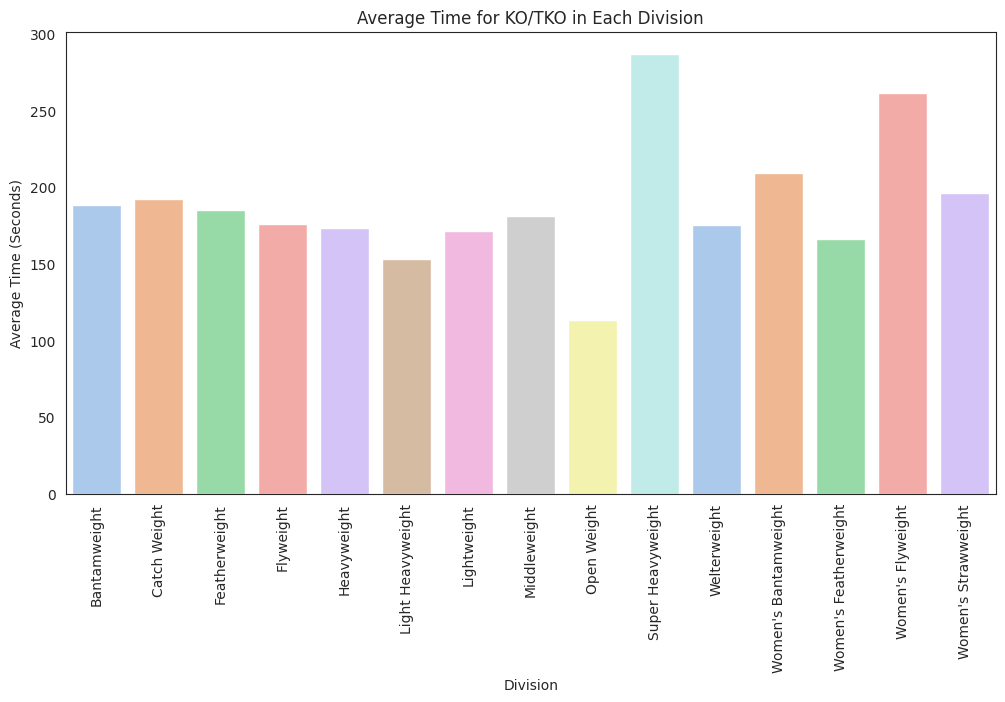

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data for KO/TKO
ko_tko_data = age_data[age_data['method'] == 'KO/TKO']

average_time_per_division = ko_tko_data.groupby('division')['total_comp_time'].mean().reset_index()
average_time_per_division['total_comp_time'] //= 2

# Plot bar chart for average time per division
plt.figure(figsize=(12, 6))
sns.barplot(x='division', y='total_comp_time', data=average_time_per_division, palette='pastel')
plt.title('Average Time for KO/TKO in Each Division')
plt.xlabel('Division')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=90)
plt.show()


# Average Time for SUB in Each Division

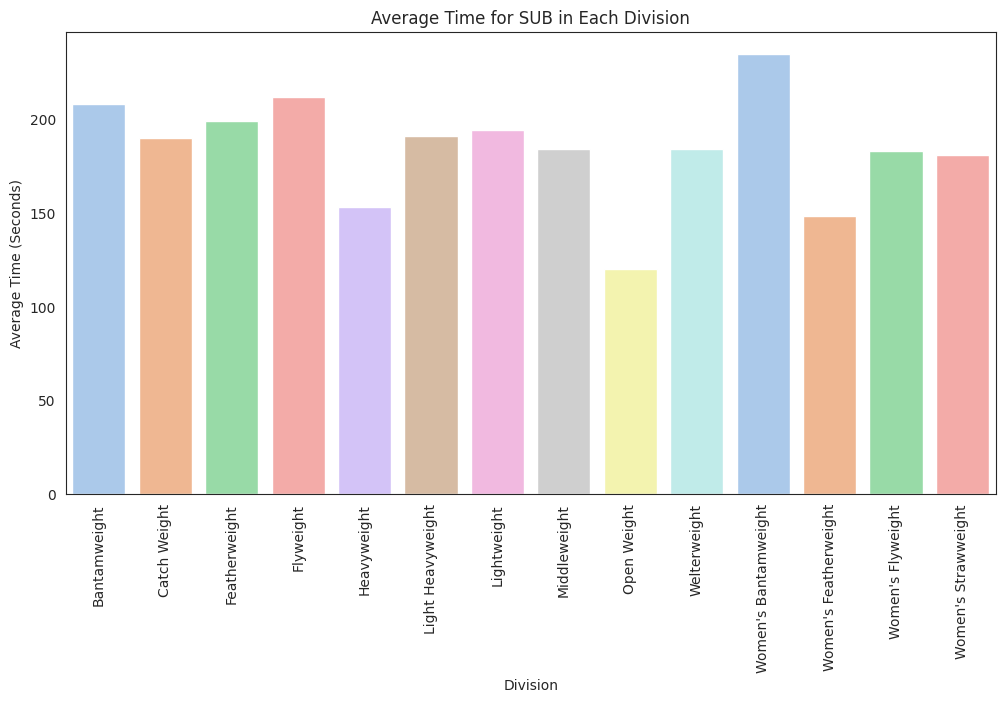

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data for SUB
sub_data = age_data[age_data['method'] == 'SUB']

average_time_per_division = sub_data.groupby('division')['total_comp_time'].mean().reset_index()
average_time_per_division['total_comp_time'] //= 2

# Plot bar chart for average time per division
plt.figure(figsize=(12, 6))
sns.barplot(x='division', y='total_comp_time', data=average_time_per_division, palette='pastel')
plt.title('Average Time for SUB in Each Division')
plt.xlabel('Division')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=90)
plt.show()


# **What is the match duration required for a knockout (KO) or submission across division?**

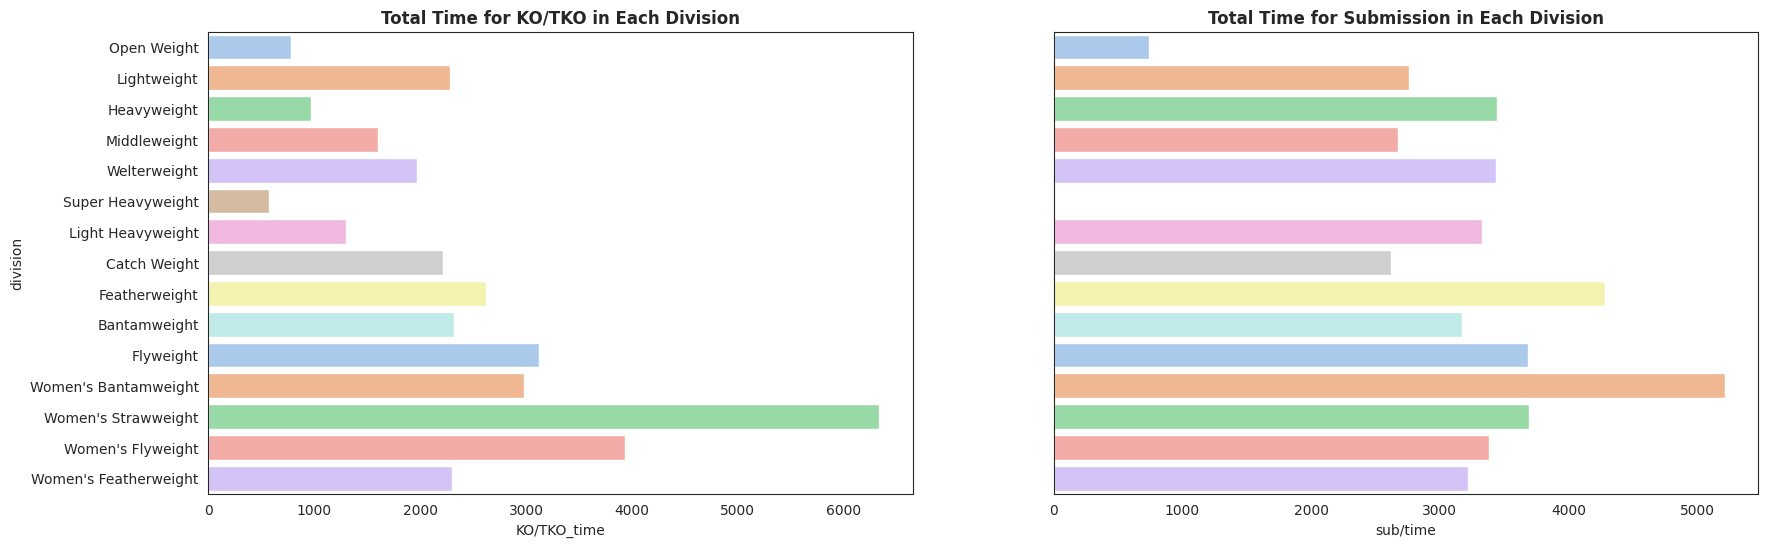

In [22]:
import numpy as np

weights = age_data['division'].unique()

pivot = age_data.pivot_table(values="result", index="division", columns="method", aggfunc="count", fill_value=0).apply(lambda x: x // 2)

pivot["total_fights"] = pivot.iloc[:, 0:7].sum(axis=1)
time_by_division = pd.DataFrame(age_data.groupby("division")["total_comp_time"].sum() // 2)
pivot = pivot.join(time_by_division)

pivot["sub/time"] = pivot["total_comp_time"] // pivot["SUB"]
pivot["KO/TKO_time"] = pivot["total_comp_time"] // pivot["KO/TKO"]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
g = sns.barplot(y=pivot.index, x="KO/TKO_time", data=pivot, order=weights, ax=axes[0], palette='pastel')
g1 = sns.barplot(y=pivot.index, x="sub/time", data=pivot, order=weights, ax=axes[1], palette='pastel')
axes[0].set_title('Total Time for KO/TKO in Each Division', weight='bold')
axes[1].set_title('Total Time for Submission in Each Division', weight='bold')
g1.set_ylabel('')
plt.show()


**Refined Dataset(Consisting of only features required for further analysis)**

In [222]:
new_df=main_df[['division','fighter','result','age','height','reach','knockdowns','method','stance','total_strikes_landed','total_strikes_attempts','total_strikes_def','takedowns_landed','takedowns_attempts','sub_attempts','takedowns_accuracy','sig_strikes_accuracy','total_strikes_accuracy','head_strikes_accuracy','body_strikes_accuracy','head_strikes_attempts', 'body_strikes_attempts','total_strikes_def','sig_strikes_landed','sig_strikes_def','takedowns_def']]

**Taking last 9000 data points, data points are in pair i.e for each match we have two data points**

In [223]:
temp_df=new_df.tail(9000)

In [224]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 4322 to 13321
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   division                9000 non-null   object 
 1   fighter                 9000 non-null   object 
 2   result                  9000 non-null   int64  
 3   age                     9000 non-null   float64
 4   height                  9000 non-null   float64
 5   reach                   8707 non-null   float64
 6   knockdowns              9000 non-null   int64  
 7   method                  9000 non-null   object 
 8   stance                  8952 non-null   object 
 9   total_strikes_landed    9000 non-null   int64  
 10  total_strikes_attempts  9000 non-null   int64  
 11  total_strikes_def       9000 non-null   float64
 12  takedowns_landed        9000 non-null   int64  
 13  takedowns_attempts      9000 non-null   int64  
 14  sub_attempts            9000 non-nul

In [225]:
# Reset the indices
temp_df.reset_index(drop=True, inplace=True)
temp_df.head()

,division,fighter,result,age,height,reach,knockdowns,method,stance,total_strikes_landed,...,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy,head_strikes_attempts,body_strikes_attempts,total_strikes_def,sig_strikes_landed,sig_strikes_def,takedowns_def
0,Bantamweight,Chico Camus,0,37.0,66.0,66.0,0,SUB,Orthodox,34,...,56.097561,61.818182,42.857143,80.000000,28,5,61.194030,23,71.428571,100.000000
1,Bantamweight,Dustin Kimura,1,33.0,67.0,71.0,0,SUB,Orthodox,26,...,28.571429,38.805970,26.000000,75.000000,50,4,38.181818,16,43.902439,66.666667
2,Lightweight,Yves Edwards,0,45.0,69.0,73.0,0,S-DEC,Southpaw,64,...,50.434783,51.200000,39.024390,70.000000,82,20,54.577465,58,65.765766,100.000000
3,Lightweight,Isaac Vallie-Flagg,1,44.0,68.0,70.0,0,S-DEC,Orthodox,129,...,34.234234,45.422535,26.111111,66.666667,180,27,48.800000,76,49.565217,66.666667
4,Lightweight,Jacob Volkmann,0,41.0,69.0,71.0,0,SUB,Southpaw,11,...,11.764706,18.333333,10.810811,16.666667,37,6,34.905660,6,40.000000,0.000000


**Data Cleaning: This code will drop pairs of rows where any of the rows in the pair have a NaN or NULL value in the "stance" variable**

In [226]:
start_index = temp_df.index.min()
stance_index_to_drop = []
for i in range(start_index, (len(temp_df) - start_index) // 2 + start_index):
    index = i * 2 - start_index
    if pd.isna(temp_df.loc[index, 'stance']) or pd.isna(temp_df.loc[index + 1, 'stance']):
        stance_index_to_drop.extend([index, index + 1])

temp_df.drop(stance_index_to_drop, inplace=True)


In [227]:
temp_df.reset_index(drop=True, inplace=True)

**Data Cleaning: This code will drop pairs of rows where any of the rows in the pair have a NaN or NULL value in the "Reach" variable**

****

In [228]:
start_index = temp_df.index.min()

reach_index_to_drop = []
for i in range(start_index, (len(temp_df) - start_index) // 2 + start_index):
    index = i * 2 - start_index
    if pd.isna(temp_df.loc[index, 'reach']) or pd.isna(temp_df.loc[index + 1, 'reach']):
        reach_index_to_drop.extend([index, index + 1])

temp_df.drop(reach_index_to_drop, inplace=True)



In [229]:
temp_df.reset_index(drop=True, inplace=True)
temp_df.head(6)

,division,fighter,result,age,height,reach,knockdowns,method,stance,total_strikes_landed,...,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy,head_strikes_attempts,body_strikes_attempts,total_strikes_def,sig_strikes_landed,sig_strikes_def,takedowns_def
0,Bantamweight,Chico Camus,0,37.0,66.0,66.0,0,SUB,Orthodox,34,...,56.097561,61.818182,42.857143,80.000000,28,5,61.194030,23,71.428571,100.000000
1,Bantamweight,Dustin Kimura,1,33.0,67.0,71.0,0,SUB,Orthodox,26,...,28.571429,38.805970,26.000000,75.000000,50,4,38.181818,16,43.902439,66.666667
2,Lightweight,Yves Edwards,0,45.0,69.0,73.0,0,S-DEC,Southpaw,64,...,50.434783,51.200000,39.024390,70.000000,82,20,54.577465,58,65.765766,100.000000
3,Lightweight,Isaac Vallie-Flagg,1,44.0,68.0,70.0,0,S-DEC,Orthodox,129,...,34.234234,45.422535,26.111111,66.666667,180,27,48.800000,76,49.565217,66.666667
4,Lightweight,Jacob Volkmann,0,41.0,69.0,71.0,0,SUB,Southpaw,11,...,11.764706,18.333333,10.810811,16.666667,37,6,34.905660,6,40.000000,0.000000
5,Lightweight,Bobby Green,1,35.0,70.0,71.0,0,SUB,Orthodox,69,...,60.000000,65.094340,53.125000,73.684211,64,19,81.666667,54,88.235294,66.666667


In [230]:
# this is the cleaned dataset, take this one for reference.
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   division                8400 non-null   object 
 1   fighter                 8400 non-null   object 
 2   result                  8400 non-null   int64  
 3   age                     8400 non-null   float64
 4   height                  8400 non-null   float64
 5   reach                   8400 non-null   float64
 6   knockdowns              8400 non-null   int64  
 7   method                  8400 non-null   object 
 8   stance                  8400 non-null   object 
 9   total_strikes_landed    8400 non-null   int64  
 10  total_strikes_attempts  8400 non-null   int64  
 11  total_strikes_def       8400 non-null   float64
 12  takedowns_landed        8400 non-null   int64  
 13  takedowns_attempts      8400 non-null   int64  
 14  sub_attempts            8400 non-null   

In [195]:
temp_df.describe()

,result,age,height,reach,knockdowns,total_strikes_landed,total_strikes_attempts,total_strikes_def,takedowns_landed,takedowns_attempts,...,takedowns_accuracy,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy,head_strikes_attempts,body_strikes_attempts,total_strikes_def,sig_strikes_landed,sig_strikes_def
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,...,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,0.490357,34.490595,69.939048,71.743333,0.221190,56.869286,109.563571,47.543269,1.039643,2.831429,...,25.517827,45.973114,52.456731,36.837595,62.434213,70.357857,12.208095,47.543269,40.295119,54.026886
std,0.499937,4.666841,3.601451,4.364053,0.498722,43.776588,79.304341,16.714400,1.667996,3.671881,...,34.402254,15.563688,16.714400,17.171849,29.648798,59.246596,12.208142,16.714400,33.147707,15.563688
min,0.000000,21.000000,60.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,67.000000,69.000000,0.000000,22.750000,44.000000,36.363636,0.000000,0.000000,...,0.000000,36.131738,41.205597,25.574935,50.000000,25.000000,3.000000,36.363636,15.000000,44.736842
50%,0.000000,34.000000,70.000000,72.000000,0.000000,50.000000,99.000000,48.041954,0.000000,1.000000,...,0.000000,45.454545,51.958046,35.897436,66.666667,57.000000,9.000000,48.041954,33.000000,54.545455
75%,1.000000,38.000000,73.000000,75.000000,0.000000,81.000000,158.000000,58.794403,1.000000,4.000000,...,50.000000,55.263158,63.636364,46.875000,83.333333,101.000000,18.000000,58.794403,57.000000,63.868262
max,1.000000,51.000000,83.000000,84.000000,5.000000,447.000000,746.000000,100.000000,21.000000,27.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,553.000000,133.000000,100.000000,445.000000,100.000000


In [110]:
reach_diff_df=temp_df[['result','reach','division']]
reach_diff_df.head()

,result,reach,division
0,0,66.0,Bantamweight
1,1,71.0,Bantamweight
2,0,73.0,Lightweight
3,1,70.0,Lightweight
4,0,71.0,Lightweight


# REACH CALCULATION

**Considering Reach Differenec between [-6,+6]**

In [64]:
import pandas as pd
processed_data = []


for i in range(0, len(reach_diff_df), 2):
    fight = reach_diff_df.iloc[i:i+2]

    if fight['result'].sum() == 1 and fight['reach'].notnull().all():
        winner = fight[fight['result'] == 1].iloc[0]
        loser = fight[fight['result'] == 0].iloc[0]
        reach_diff = winner['reach'] - loser['reach']
        processed_data.append({
            'reach_difference': reach_diff,
            'division': winner['division']
        })
    else:
       continue


processed_df = pd.DataFrame(processed_data)
total_sample_size=processed_df.shape[0]
filtered_reach_diff = processed_df[(processed_df['reach_difference'] >= -6) & (processed_df['reach_difference'] <= 6)]
division_counts = filtered_reach_diff['division'].value_counts()
threshold = 30
significant_divisions = division_counts[division_counts >= threshold].index
reach_final_filtered_df = filtered_reach_diff[filtered_reach_diff['division'].isin(significant_divisions)]
reach_final_filtered_df.to_csv('filtered_ufc_fights.csv', index=False)
total_rows_considered = reach_final_filtered_df.shape[0]
percentage_of_fights_considered = (total_rows_considered / total_sample_size) * 100

print(f"Total fights per division (significant divisions only):\n{division_counts[division_counts >= threshold]}")
print(f"Percentage of fights for each division:\n{percentage_of_fights_considered}")
reach_final_filtered_df.head()

Total fights per division (significant divisions only):
division
Lightweight             650
Welterweight            611
Featherweight           461
Middleweight            438
Bantamweight            418
Light Heavyweight       302
Heavyweight             282
Flyweight               229
Women's Strawweight     212
Women's Flyweight       151
Women's Bantamweight    135
Catch Weight             31
Name: count, dtype: int64
Percentage of fights for each division:
95.16873027433843


,reach_difference,division
0,5.0,Bantamweight
1,-3.0,Lightweight
2,0.0,Lightweight
3,-1.0,Welterweight
4,-1.0,Lightweight


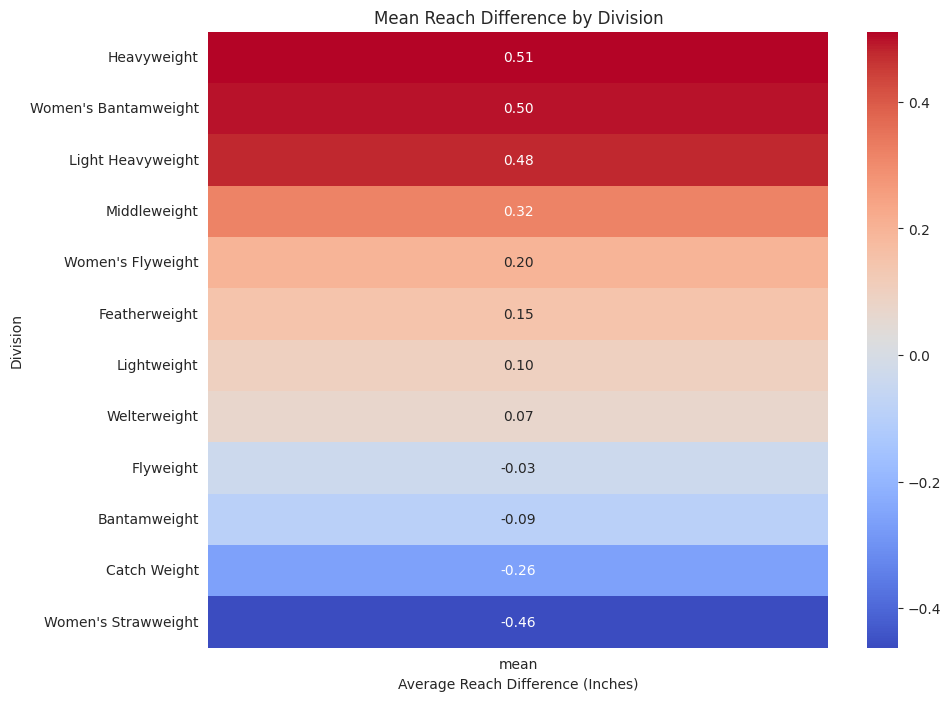

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
division_stats = reach_final_filtered_df.groupby('division')['reach_difference'].agg(['mean', 'count'])
filtered_divisions = division_stats[division_stats['count'] > 30]

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(filtered_divisions[['mean']].sort_values(by='mean', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Mean Reach Difference by Division')
plt.ylabel('Division')
plt.xlabel('Average Reach Difference (Inches)')
plt.show()


**Considering Reach Differenec between [-4,+4]**

In [66]:
import pandas as pd
processed_data = []


for i in range(0, len(reach_diff_df), 2):
    fight = reach_diff_df.iloc[i:i+2]

    if fight['result'].sum() == 1 and fight['reach'].notnull().all():
        winner = fight[fight['result'] == 1].iloc[0]
        loser = fight[fight['result'] == 0].iloc[0]
        reach_diff = winner['reach'] - loser['reach']
        processed_data.append({
            'reach_difference': reach_diff,
            'division': winner['division']
        })
    else:
        continue

processed_df = pd.DataFrame(processed_data)
total_sample_size=processed_df.shape[0]
filtered_reach_diff = processed_df[(processed_df['reach_difference'] >= -4) & (processed_df['reach_difference'] <= 4)]
division_counts = filtered_reach_diff['division'].value_counts()

threshold = 30
significant_divisions = division_counts[division_counts >= threshold].index
final_filtered_df = filtered_reach_diff[filtered_reach_diff['division'].isin(significant_divisions)]


final_filtered_df.to_csv('filtered_ufc_fights.csv', index=False)
total_rows_considered = final_filtered_df.shape[0]
percentage_of_fights_considered = (total_rows_considered / total_sample_size) * 100

print(f"Total fights per division (significant divisions only):\n{division_counts[division_counts >= threshold]}")
print(f"Percentage of fights for each division:\n{percentage_of_fights_considered}")
final_filtered_df.head()

Total fights per division (significant divisions only):
division
Lightweight             576
Welterweight            552
Featherweight           409
Middleweight            370
Bantamweight            358
Light Heavyweight       254
Heavyweight             237
Flyweight               211
Women's Strawweight     185
Women's Flyweight       129
Women's Bantamweight    124
Name: count, dtype: int64
Percentage of fights for each division:
82.66569555717408


,reach_difference,division
1,-3.0,Lightweight
2,0.0,Lightweight
3,-1.0,Welterweight
4,-1.0,Lightweight
5,1.0,Flyweight


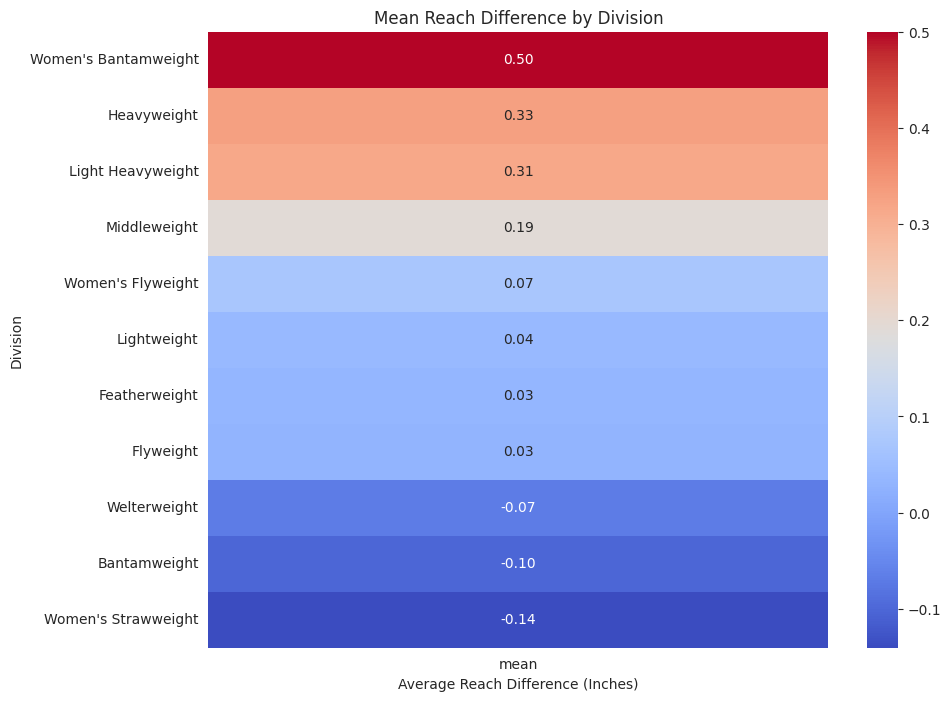

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

division_stats = final_filtered_df.groupby('division')['reach_difference'].agg(['mean', 'count'])
filtered_divisions = division_stats[division_stats['count'] > 30]

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(filtered_divisions[['mean']].sort_values(by='mean', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Mean Reach Difference by Division')
plt.ylabel('Division')
plt.xlabel('Average Reach Difference (Inches)')
plt.show()


<Figure size 1400x800 with 0 Axes>

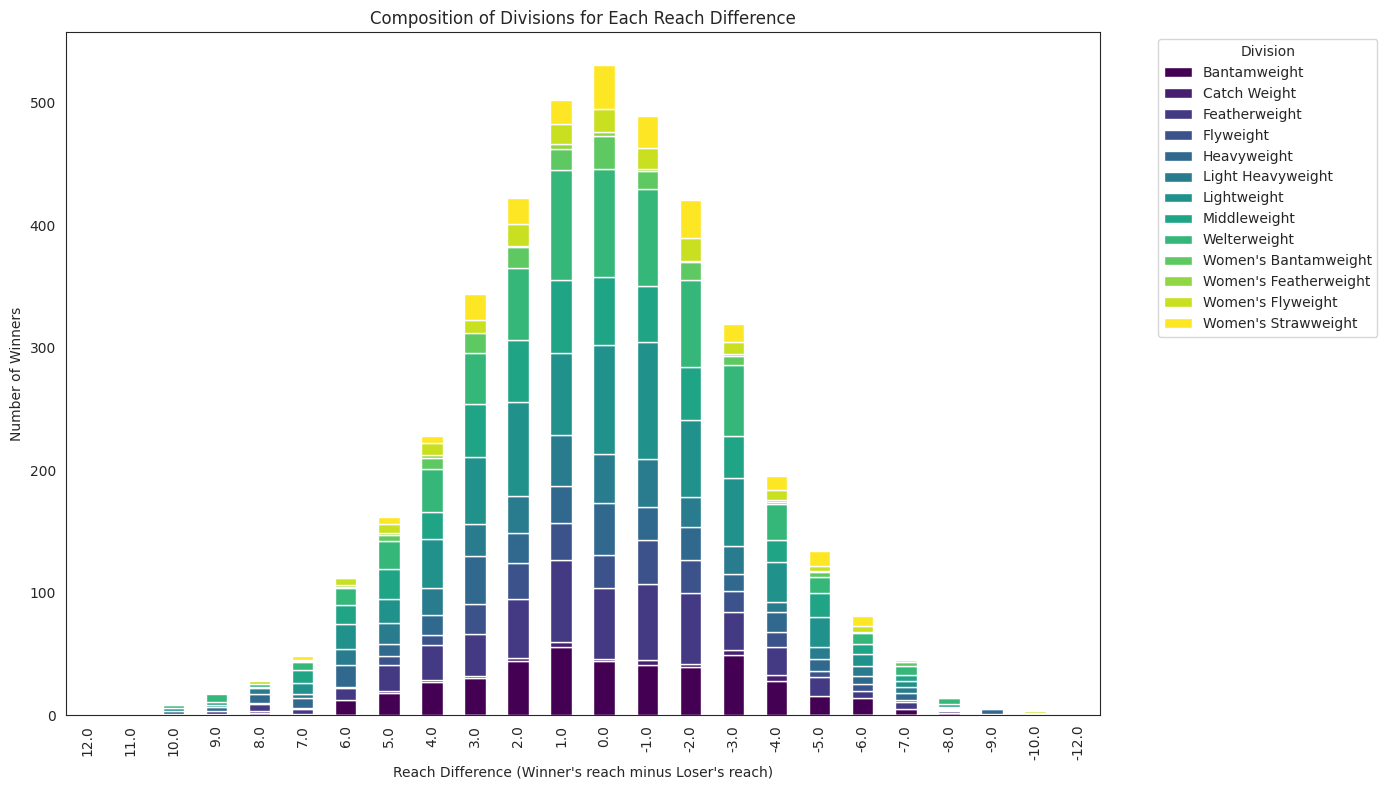

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grouped = processed_df.groupby(['reach_difference', 'division'])
division_composition = grouped.size().unstack(fill_value=0)
stats = grouped['reach_difference'].agg(['mean', 'std']).unstack()
division_composition.sort_index(inplace=True, ascending=False)

plt.figure(figsize=(14, 8))
division_composition.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Composition of Divisions for Each Reach Difference')
plt.xlabel('Reach Difference (Winner\'s reach minus Loser\'s reach)')
plt.ylabel('Number of Winners')
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


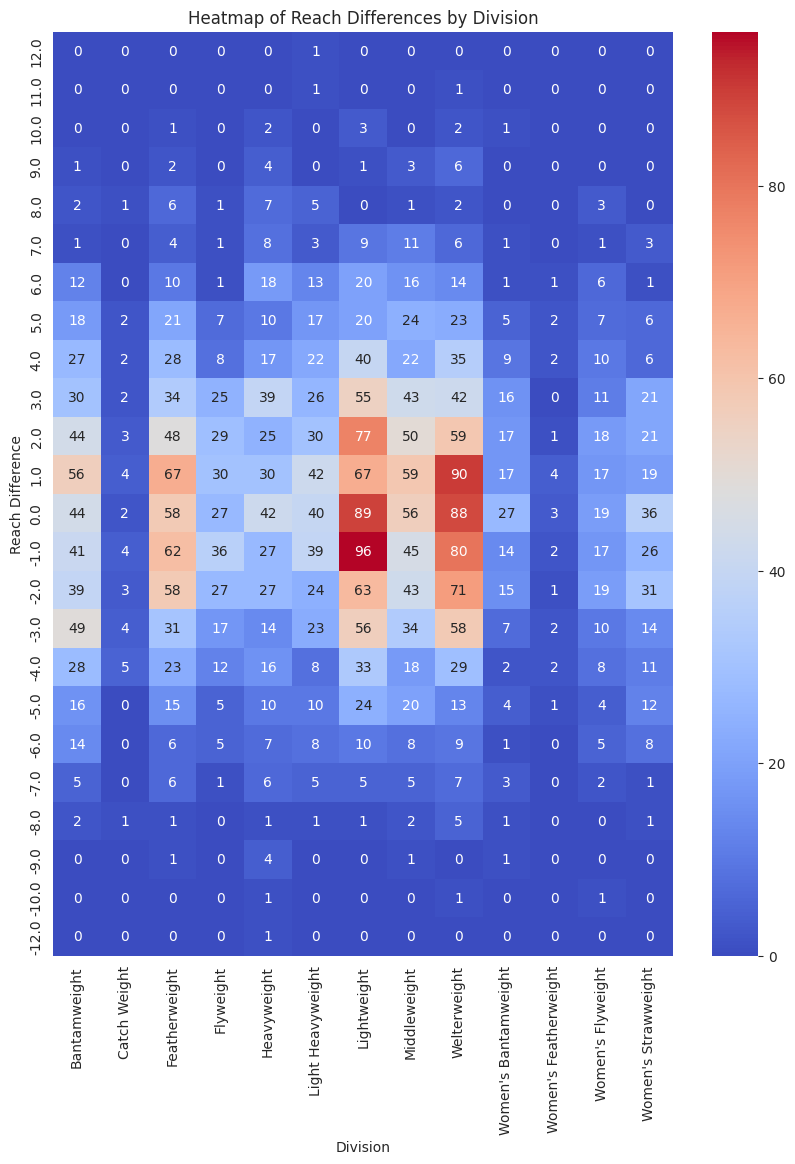

In [69]:
# This part can be removed, does not give any significant insights.





import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to get counts of each combination of reach difference and division
heatmap_data = processed_df.groupby(['reach_difference', 'division']).size().unstack(fill_value=0)

# Sort the index for better visualization
heatmap_data.sort_index(ascending=False, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Reach Differences by Division')
plt.ylabel('Reach Difference')
plt.xlabel('Division')
plt.show()


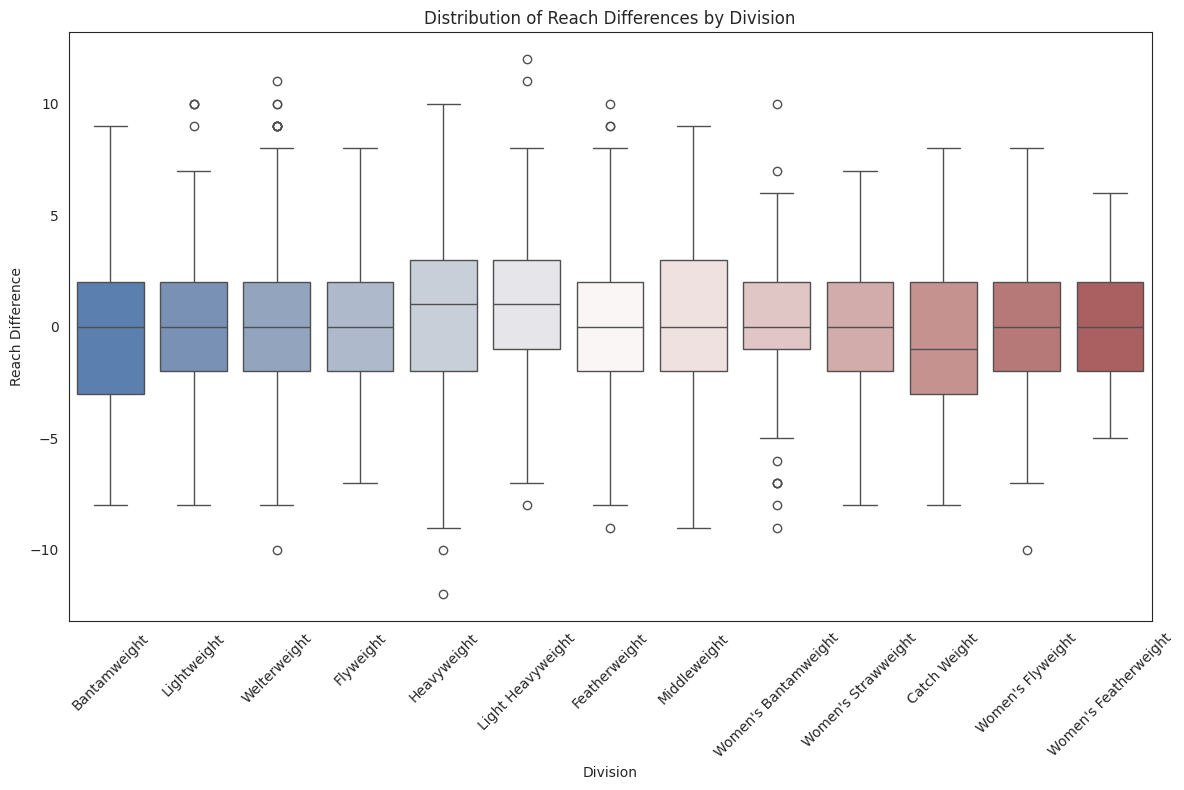

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(x='division', y='reach_difference', data=processed_df, palette="vlag")
plt.xticks(rotation=45)
plt.title('Distribution of Reach Differences by Division')
plt.ylabel('Reach Difference')
plt.xlabel('Division')
plt.tight_layout()
plt.show()


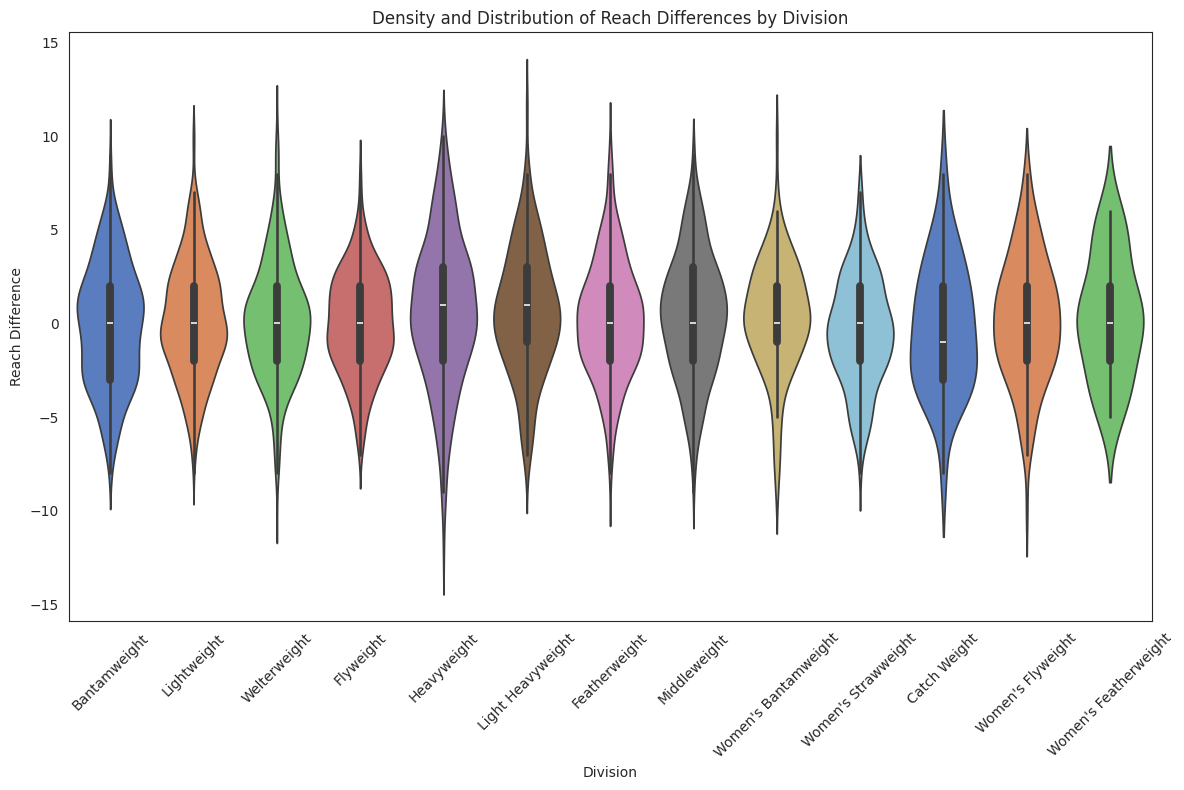

In [71]:
# Same as above, so we can remove this.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to see the distribution and density of reach differences by division
plt.figure(figsize=(12, 8))
sns.violinplot(x='division', y='reach_difference', data=processed_df, palette="muted", scale='width')
plt.xticks(rotation=45)
plt.title('Density and Distribution of Reach Differences by Division')
plt.ylabel('Reach Difference')
plt.xlabel('Division')
plt.tight_layout()
plt.show()


# HEIGHT CALCULATION

In [72]:
height_diff_df=temp_df[['result','height','division']]
height_diff_df.head()

,result,height,division
0,0,66.0,Bantamweight
1,1,67.0,Bantamweight
2,0,69.0,Lightweight
3,1,68.0,Lightweight
4,0,69.0,Lightweight


In [73]:
import pandas as pd
processed_data = []


for i in range(0, len(height_diff_df), 2):
    fight = height_diff_df.iloc[i:i+2]

    if fight['result'].sum() == 1 and fight['height'].notnull().all():
        winner = fight[fight['result'] == 1].iloc[0]
        loser = fight[fight['result'] == 0].iloc[0]
        height_diff = winner['height'] - loser['height']
        processed_data.append({
            'height_diff': height_diff,
            'division': winner['division']
        })
    else:
       continue


processed_df = pd.DataFrame(processed_data)
total_sample_size=processed_df.shape[0]
filtered_reach_diff = processed_df[(processed_df['height_diff'] >= -6) & (processed_df['height_diff'] <= 6)]
division_counts = filtered_reach_diff['division'].value_counts()
threshold = 30
significant_divisions = division_counts[division_counts >= threshold].index
final_filtered_df = filtered_reach_diff[filtered_reach_diff['division'].isin(significant_divisions)]
final_filtered_df.to_csv('filtered_ufc_fights.csv', index=False)
total_rows_considered = final_filtered_df.shape[0]
percentage_of_fights_considered = (total_rows_considered / total_sample_size) * 100

print(final_filtered_df)
print(f"Total fights per division (significant divisions only):\n{division_counts[division_counts >= threshold]}")
print(f"Percentage of fights for each division:\n{percentage_of_fights_considered}")


      height_diff      division
0             1.0  Bantamweight
1            -1.0   Lightweight
2             1.0   Lightweight
3            -3.0  Welterweight
4             0.0   Lightweight
...           ...           ...
4114         -2.0  Bantamweight
4115         -1.0   Lightweight
4116          1.0   Heavyweight
4117         -2.0  Welterweight
4118          3.0   Lightweight

[4057 rows x 2 columns]
Total fights per division (significant divisions only):
division
Lightweight             662
Welterweight            638
Featherweight           478
Middleweight            457
Bantamweight            428
Light Heavyweight       315
Heavyweight             301
Flyweight               232
Women's Strawweight     216
Women's Flyweight       157
Women's Bantamweight    141
Catch Weight             32
Name: count, dtype: int64
Percentage of fights for each division:
98.49478028647731


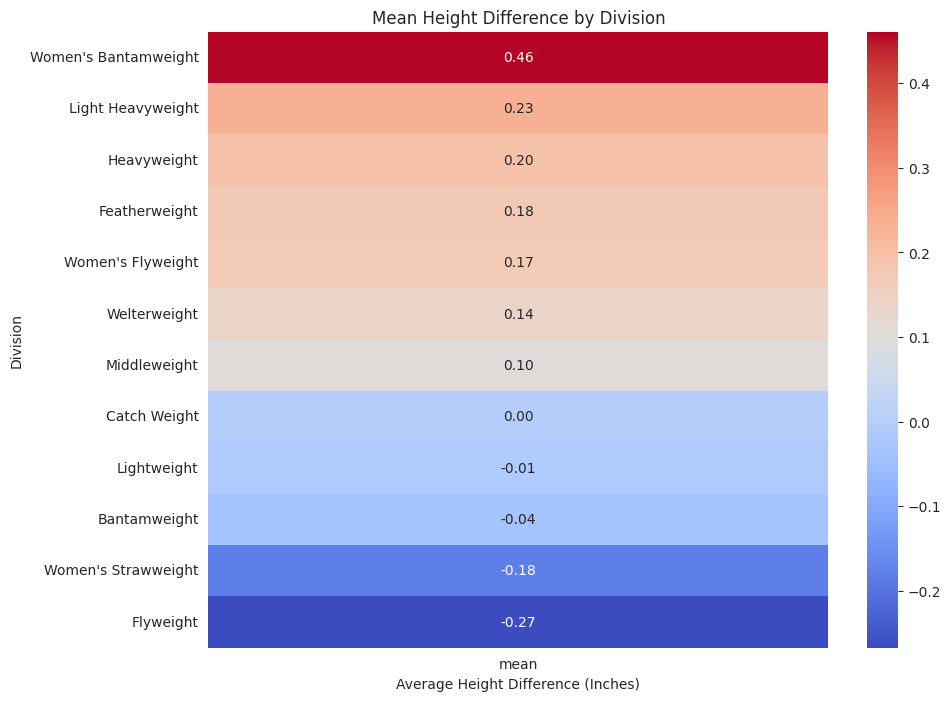

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

division_stats = final_filtered_df.groupby('division')['height_diff'].agg(['mean', 'count'])
filtered_divisions = division_stats[division_stats['count'] > 30]

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(filtered_divisions[['mean']].sort_values(by='mean', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Mean Height Difference by Division')
plt.ylabel('Division')
plt.xlabel('Average Height Difference (Inches)')
plt.show()


# **Hypothesis 1: There exists an indentifiable relation between reach and match win across divisions**
**Null Hypothesis: There is no significant relationship between reach and match win across divisions.**

**Alternate Hypothesis: There is a significant relationship between reach and match win across divisions.**

***Statistical Test: Binomial Test***

In [75]:
import pandas as pd
from scipy import stats

paired_df = pd.DataFrame({
    'division': reach_diff_df['division'][::2].values,
    'reach_diff': reach_diff_df['reach'][1::2].values - reach_diff_df['reach'][::2].values,
    'result': reach_diff_df['result'][1::2].values
})
paired_df = paired_df[(paired_df['reach_diff'] >= -6) & (paired_df['reach_diff'] <= 6)]
division_counts = paired_df['division'].value_counts()
significant_divisions = division_counts[division_counts > 30].index
paired_df = paired_df[paired_df['division'].isin(significant_divisions)]

paired_df.head()

,division,reach_diff,result
0,Bantamweight,5.0,1
1,Lightweight,-3.0,1
2,Lightweight,0.0,1
3,Welterweight,-1.0,1
4,Lightweight,-1.0,1


*Since the paired_df dataset only includes winners and their reach differences, we want to test whether having a positive reach advantage (positive reach_diff) is a common characteristic among winners, as opposed to winners with a reach disadvantage (negative reach_diff).The Sign Test is appropriate in this context because it doesn't assume any specific distribution and is suitable for situations where we want to compare medians rather than means. It's used to test the hypothesis that the probability of a "success" on any given trial is 0.5.*

In [76]:
df = paired_df
positive_reach_diff = np.sum(df['reach_diff'] > 0)
negative_reach_diff = np.sum(df['reach_diff'] < 0)

p_value = stats.binom_test(positive_reach_diff, positive_reach_diff + negative_reach_diff, p=0.5, alternative='two-sided')

print(f'P-value from the Sign Test: {p_value}')

P-value from the Sign Test: 0.024709797740999975


*Inference: A p-value of 0.024 suggests that there is a statistically significant difference between the number of winners with a positive reach advantage and those with a negative reach advantage (or no advantage). Since the p-value is less than the conventional significance level of 0.05, we can reject the null hypothesis. We can infer that having a positive reach advantage is associated with winning matches more often than would be expected by chance. In other words,a significant number of winners had a reach advantage over their opponents, indicating that reach could be an influential factor in winning UFC fights.*

# **HYPOTHESIS 2: Method of Victory as an Indicator of Division Characteristics**

**Null Hypothesis (H0): The method of victory (e.g., submission, decision) is independent of the division.**

**Alternative Hypothesis (H1): Certain victory methods are more common in specific divisions, suggesting that division characteristics influence the fighting style or strategy.**


***Statistical Test: Chi-square test***

In [77]:
contingency_table = pd.crosstab(temp_df['division'], temp_df['method'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Hypothesis 2 - Chi-squared Test: chi2 = {chi2}, p-value = {p_value}')

Hypothesis 2 - Chi-squared Test: chi2 = 444.68242104527764, p-value = 4.4041738889661354e-55


*Result of chi-squared test: The chi-square statistic is very high and the p-value is almost zero. Consequently, it may be implied that wining methods (such as decisions, submissions) distribution over divisions is not random.*

*Inference: With such a low p-value, we reject the null hypothesis (H0) that the method of victory is independent of the division. The alternative hypothesis (H1) is supported, indicating that certain methods of victory are indeed more common in specific divisions, which could suggest that division characteristics influence the fighting style or strategy significantly.*

# **Hypothesis 3: Striking Defense and Winning Correlation**

**Null Hypothesis (H0): Striking defense (as a percentage) does not correlate with winning.**

**Alternative Hypothesis (H1): Higher striking defense percentages are associated with a higher likelihood of winning.**

***Statistical Test: Pearson Correlation***

In [78]:
correlation, p_value = stats.pearsonr(temp_df['total_strikes_def'], temp_df['result'])
print(f'Hypothesis 3 - Pearson Correlation: correlation = {correlation}, p-value = {p_value}')


Hypothesis 3 - Pearson Correlation: correlation = 0.27717020631434375, p-value = 5.338865791725281e-148


*Pearson Correlation Result: A positive moderate relationship is suggested by a correlation coefficient of 0.277. This shows that the correlation is statistically significant as it p-value is almost zero and not due to random chance.*

*Detailed Inference: It can further be inferred that if you are good at defending against strikes, then there are high chances of success. That means, for a fighter’s ability to land strikes may be less important than their defensive skills in striking.Therefore, we reject H0 and accept H1 that striking defense correlates with winning.*

# **Hypothesis 4: Stance Advantage in Fight Outcomes**

**Null Hypothesis (H0): Fighter stance (Orthodox or Southpaw) does not give an advantage in fights.**

**Alternative Hypothesis (H1): Southpaw fighters have an advantage in fights, reflected in higher win rates across divisions.**

***Statistical Test: Logistic Regression***

In [79]:
hypothesis_4_df = temp_df.copy()
hypothesis_4_df['is_southpaw'] = temp_df['stance'].apply(lambda x: 1 if x == 'Southpaw' else 0)
model = sm.Logit(hypothesis_4_df['result'], hypothesis_4_df[['is_southpaw']])
results = model.fit()
print(f'Hypothesis 4 - Logistic Regression:\n{results.summary()}')

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 3
Hypothesis 4 - Logistic Regression:
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8400
Model:                          Logit   Df Residuals:                     8399
Method:                           MLE   Df Model:                            0
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:              -0.0002671
Time:                        04:55:22   Log-Likelihood:                -5822.4
converged:                       True   LL-Null:                       -5820.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
is_southpaw    -0.0059      0.048     -0.121      0.904      -0.101   

*Logistic Regression Outcome: The high p-value indicated that the result is not statistically significant for the variable ‘is_southpaw’.*

*Detailed inference:  There is no evidence to reject H0 based on this analysis.It appears there is no change in the likelihood of winning between southpaw and orthodox fighters indicating stance alone cannot confer a natural advantage in a fight. This might be useful to fighters who might think about changing stances as an advantageous move. According to this data, stance should not be what fighters base their strategies around*

# **Hypothesis 5: Impact of Age on Fight Strategy**

**Null Hypothesis (H0): Age is not related to the fight strategy (strikes versus takedowns).**

**Alternative Hypothesis (H1): Older fighters rely more on takedowns than strikes when compared to younger fighters, possibly due to a decline in speed or reach advantage.**

***Statistical Test: Pearson Correlation***

In [80]:
correlation_strikes, p_value_strikes = stats.pearsonr(temp_df['age'], temp_df['total_strikes_landed'])
correlation_takedowns, p_value_takedowns = stats.pearsonr(temp_df['age'], temp_df['takedowns_landed'])
print(f'Hypothesis 5 - Correlation Analysis:\nStrikes: correlation = {correlation_strikes}, p-value = {p_value_strikes}')
print(f'Takedowns: correlation = {correlation_takedowns}, p-value = {p_value_takedowns}')

Hypothesis 5 - Correlation Analysis:
Strikes: correlation = -0.08616186031268691, p-value = 2.565565258862092e-15
Takedowns: correlation = -0.05317163683996892, p-value = 1.0826681936150583e-06


*The correlation analysis reveals that both strikes and takedowns display a slight negative correlation with age, and the statistical significance of the p-values confirms these findings. From this, we can infer that as fighters grow older, there tends to be a decrease in both strike and takedown numbers. However, the weak correlation suggests that while there's a noticeable pattern, it's not particularly strong. This could imply that aging fighters might adjust their fighting style away from high-frequency striking and takedown attempts towards more strategic and potentially energy-conserving tactics. Consequently, this insight could lead to a reevaluation of how older fighters approach their training, prioritizing efficiency over sheer volume.Given the p-values are close to zero, we reject the null hypothesis for both striking and takedowns.*

# **Hypothesis 6: Aggression Leads to More Wins**

**Null Hypothesis (H0): The number of strikes attempted and takedowns attempted does not correlate with winning.**

**Alternative Hypothesis (H1): Fighters who attempt more strikes and takedowns are more likely to win, suggesting that aggression is a significant factor in outcomes.**

***Statistical Test: Pearson Correlation***

In [81]:
correlation_strike_attempts, p_value_strike_attempts = stats.pearsonr(temp_df['total_strikes_attempts'], temp_df['result'])
correlation_takedown_attempts, p_value_takedown_attempts = stats.pearsonr(temp_df['takedowns_attempts'], temp_df['result'])
print(f'Hypothesis 6 - Aggression and Wins:\nStrike Attempts: correlation = {correlation_strike_attempts}, p-value = {p_value_strike_attempts}')
print(f'Takedown Attempts: correlation = {correlation_takedown_attempts}, p-value = {p_value_takedown_attempts}')

Hypothesis 6 - Aggression and Wins:
Strike Attempts: correlation = 0.16755027725360921, p-value = 6.129522008713119e-54
Takedown Attempts: correlation = 0.09134356995001541, p-value = 4.941866567805317e-17


*Correlation Result for Strike Attempts: The positive correlation coefficient is approximately 0.168 with a p-value close to zero.*

*Correlation Result for Takedown Attempts: The positive correlation coefficient is approximately 0.091 with a p-value close to zero.*

*Inference: Both strike attempts and takedown attempts have a significant positive correlation with winning, though the correlation is modest. This suggests that more aggressive fighters, in terms of attempting more strikes and takedowns, are more likely to win. Hence, we reject H0 and accept H1 that aggression correlates with winning, but the effect is relatively small.*

# **HYPOTHESIS 7: Older(Postive Age difference) Winning fighters prefer more head strikes than body strikes**

**Null Hypothesis (H0): There is no difference in the preference for head strikes over body strikes between older winning fighters and younger winning fighters. This means that age does not influence a fighter's strategy regarding the preference for head versus body strikes.**

**Alternative Hypothesis (H1): Older winning fighters have a different preference for head strikes over body strikes compared to younger winning fighters. Specifically, older fighters prefer head strikes more than body strikes relative to their younger counterparts.**

***Statistical Test: t-Test if the data in normal and homogeneous else Mann-Whitney U test***

In [131]:
import pandas as pd
from scipy import stats

copy_df = temp_df.copy()

copy_df['head_strikes_diff'] = copy_df['head_strikes_attempts'].diff().iloc[1::2]
copy_df['body_strikes_diff'] = copy_df['body_strikes_attempts'].diff().iloc[1::2]
copy_df['age_diff'] = copy_df['age'].diff().iloc[1::2]

copy_df['preference_for_head_strikes'] = copy_df['head_strikes_diff'] - copy_df['body_strikes_diff']
df_winners = copy_df.iloc[1::2].copy()

older_winners_pref = df_winners[df_winners['age_diff'] > 0]

normality = stats.shapiro(older_winners_pref['preference_for_head_strikes'].dropna())
print(f'Normality p-value: {normality.pvalue}')
if normality.pvalue < 0.05:
    print("Data is not normally distributed. Using non-parametric test.")
    younger_winners_pref = df_winners[df_winners['age_diff'] < 0]
    u_stat, u_pvalue = stats.mannwhitneyu(older_winners_pref['preference_for_head_strikes'].dropna(), younger_winners_pref['preference_for_head_strikes'].dropna())
    print(f'Mann-Whitney U test p-value: {u_pvalue}')
else:
    print("Data is normally distributed. Using t-test.")
    t_stat, p_value = stats.ttest_1samp(older_winners_pref['preference_for_head_strikes'].dropna(), 0)
    print(f'T-statistic: {t_stat}, P-value: {p_value}')


Normality p-value: 1.0905618666145874e-20
Data is not normally distributed. Using non-parametric test.
Mann-Whitney U test p-value: 4.607809923836361e-16


*Given that the p-value from the Mann-Whitney U test is extremely low, we can confidently reject the null hypothesis. This indicates that older winning fighters have a statistically significant preference for head strikes over body strikes compared to their younger counterparts. This finding supports the hypothesis and suggests that older fighters might adopt a fighting style that relies more on targeting the head than the body, possibly due to factors like experience or strategic adaptation over their career.*

# **Below are some Trivial Hypothesis,Starts Here**

**These are some trivial Hypotheses which might not go in final version**

In [89]:
df_newData=df[['result','age','takedowns_accuracy','sig_strikes_accuracy','total_strikes_accuracy','head_strikes_accuracy','body_strikes_accuracy']]

In [90]:
df_newData.head()

,result,age,takedowns_accuracy,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy
0,0,37.0,33.333333,56.097561,61.818182,42.857143,80.000000
1,1,33.0,0.000000,28.571429,38.805970,26.000000,75.000000
2,0,45.0,33.333333,50.434783,51.200000,39.024390,70.000000
3,1,44.0,0.000000,34.234234,45.422535,26.111111,66.666667
4,0,41.0,33.333333,11.764706,18.333333,10.810811,16.666667


In [86]:
X = df_newData[['takedowns_accuracy', 'sig_strikes_accuracy', 'total_strikes_accuracy', 'head_strikes_accuracy', 'body_strikes_accuracy']]
y = df_newData['result']
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()

# Displaying the results for Hypothesis 15
print("Results for Hypothesis 15:")
print(results.summary())
print("\n")

Optimization terminated successfully.
         Current function value: 0.606197
         Iterations 5
Results for Hypothesis 15:
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8400
Model:                          Logit   Df Residuals:                     8394
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1252
Time:                        05:52:31   Log-Likelihood:                -5092.1
converged:                       True   LL-Null:                       -5820.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1890      0.094    -23.301  

In [87]:
df_newData['total_strikes_acc_interact'] = df_newData['total_strikes_accuracy'] * df_newData['total_strikes_attempts']
df_newData['takedowns_acc_interact'] = df_newData['takedowns_accuracy'] * df_newData['takedowns_attempts']
X_interaction = df_newData[['total_strikes_accuracy', 'takedowns_accuracy', 'total_strikes_acc_interact', 'takedowns_acc_interact']]
X_interaction = sm.add_constant(X_interaction)
model_interaction = sm.Logit(y, X_interaction)
results_interaction = model_interaction.fit()

# Displaying the results for Hypothesis 17
print("Results for Hypothesis 17:")
print(results_interaction.summary())

Optimization terminated successfully.
         Current function value: 0.621569
         Iterations 5
Results for Hypothesis 17:
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8400
Model:                          Logit   Df Residuals:                     8395
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1030
Time:                        05:53:49   Log-Likelihood:                -5221.2
converged:                       True   LL-Null:                       -5820.9
Covariance Type:            nonrobust   LLR p-value:                2.156e-258
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.1997      0.086 

In [88]:
X = df_newData[['takedowns_attempts']]
y = df_newData['result']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model_takedowns = sm.Logit(y, X)
results_takedowns = model_takedowns.fit()
print(f'Hypothesis 1 - Logistic Regression Results:\n{results_takedowns.summary()}\n')


Optimization terminated successfully.
         Current function value: 0.688757
         Iterations 4
Hypothesis 1 - Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8400
Model:                          Logit   Df Residuals:                     8398
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                0.006067
Time:                        06:05:48   Log-Likelihood:                -5785.6
converged:                       True   LL-Null:                       -5820.9
Covariance Type:            nonrobust   LLR p-value:                 4.318e-17
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1812      0.028     -6.

# Ends here

# **PRIME AGE RANGE**

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [183]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   division                8400 non-null   object 
 1   fighter                 8400 non-null   object 
 2   result                  8400 non-null   int64  
 3   age                     8400 non-null   float64
 4   height                  8400 non-null   float64
 5   reach                   8400 non-null   float64
 6   knockdowns              8400 non-null   int64  
 7   method                  8400 non-null   object 
 8   stance                  8400 non-null   object 
 9   total_strikes_landed    8400 non-null   int64  
 10  total_strikes_attempts  8400 non-null   int64  
 11  total_strikes_def       8400 non-null   float64
 12  takedowns_landed        8400 non-null   int64  
 13  takedowns_attempts      8400 non-null   int64  
 14  sub_attempts            8400 non-null   

In [144]:
winners_df = copy_df.iloc[1::2].copy()
winners_df.head()

,division,fighter,result,age,height,reach,knockdowns,method,stance,total_strikes_landed,...,takedowns_landed,takedowns_attempts,sub_attempts,takedowns_accuracy,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy,head_strikes_attempts,body_strikes_attempts
1,Bantamweight,Dustin Kimura,1,33.0,67.0,71.0,0,SUB,Orthodox,26,...,0,0,5,0.0,28.571429,38.805970,26.000000,75.000000,50,4
3,Lightweight,Isaac Vallie-Flagg,1,44.0,68.0,70.0,0,S-DEC,Orthodox,129,...,0,0,0,0.0,34.234234,45.422535,26.111111,66.666667,180,27
5,Lightweight,Bobby Green,1,35.0,70.0,71.0,0,SUB,Orthodox,69,...,1,1,1,100.0,60.000000,65.094340,53.125000,73.684211,64,19
7,Welterweight,Tyron Woodley,1,40.0,69.0,74.0,1,KO/TKO,Orthodox,15,...,0,0,0,0.0,68.181818,68.181818,68.421053,66.666667,19,3
9,Lightweight,Evan Dunham,1,40.0,70.0,70.0,0,S-DEC,Southpaw,98,...,0,9,0,0.0,38.396624,40.000000,36.190476,47.619048,210,21


# **Based on Win Rate**

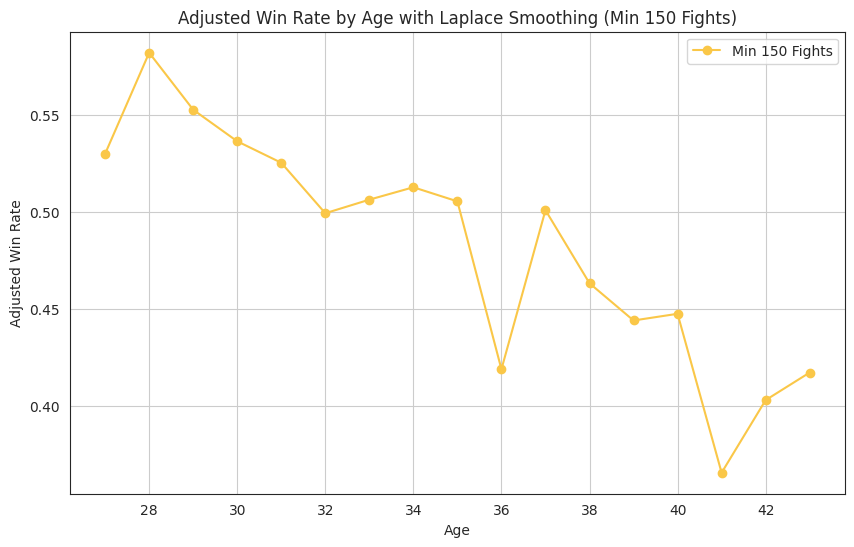

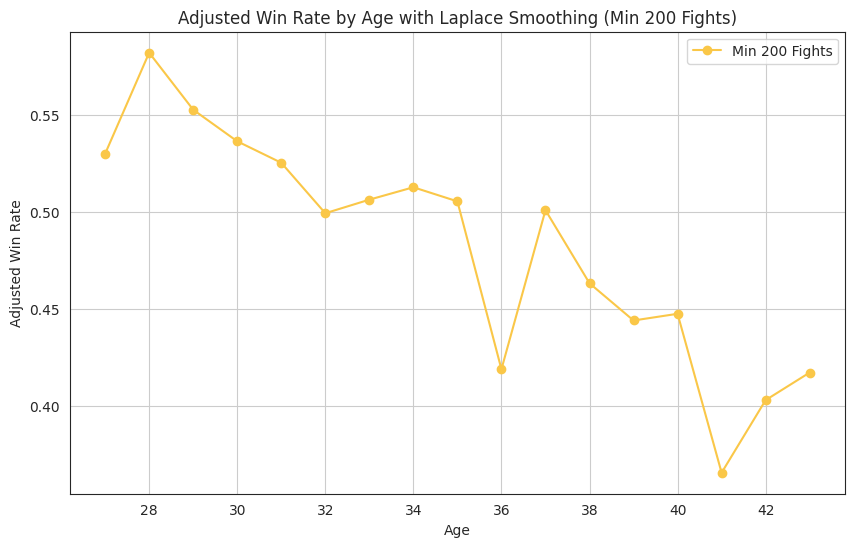

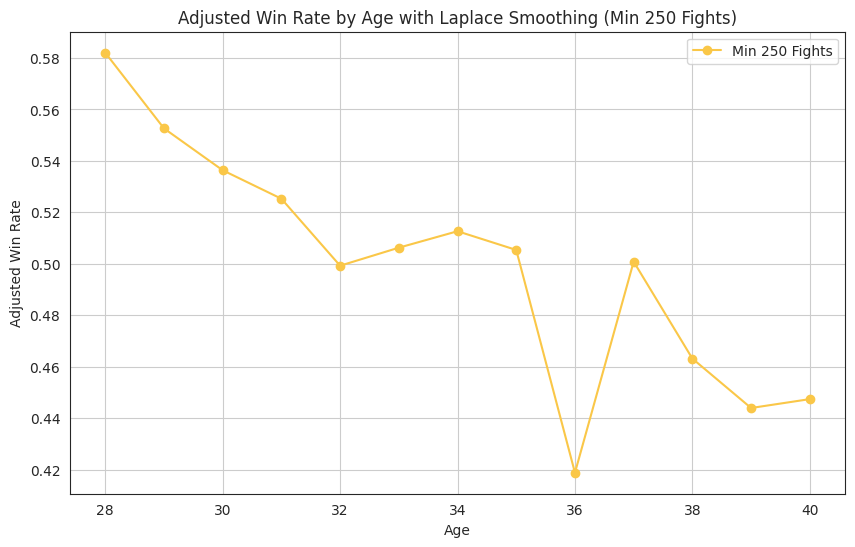

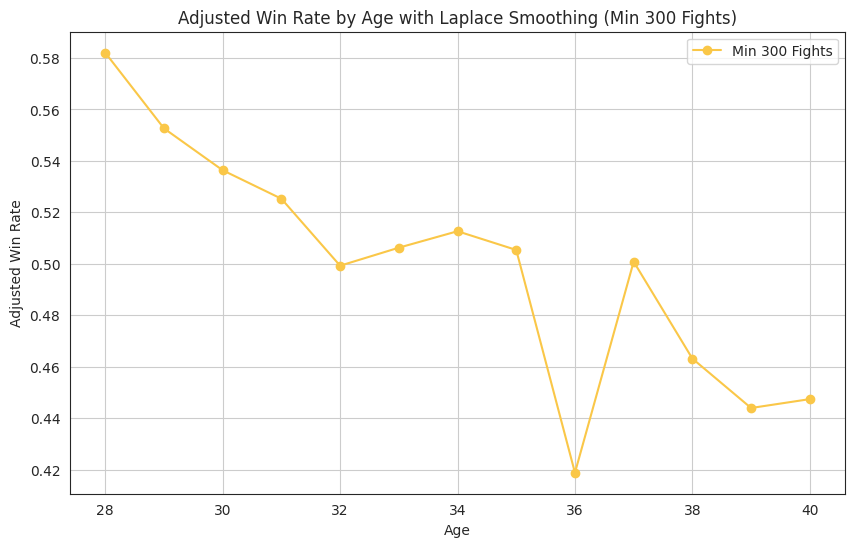

In [196]:

import pandas as pd
import matplotlib.pyplot as plt
win_rate_df=temp_df[['result','age']]
win_rate_df.describe()
alpha = 1

age_group = win_rate_df.groupby('age')['result'].agg(['sum', 'size'])
age_group['adjusted_win_rate'] = (age_group['sum'] + alpha) / (age_group['size'] + alpha * 2)
age_group.reset_index(inplace=True)
thresholds = [150, 200, 250, 300]

for threshold in thresholds:
    plt.figure(figsize=(10, 6))
    age_group_filtered = age_group[age_group['size'] >= threshold]
    plt.plot(age_group_filtered['age'], age_group_filtered['adjusted_win_rate'], marker='o', label=f'Min {threshold} Fights')
    plt.title(f'Adjusted Win Rate by Age with Laplace Smoothing (Min {threshold} Fights)')
    plt.xlabel('Age')
    plt.ylabel('Adjusted Win Rate')
    plt.legend()
    plt.grid(True)
    plt.show()


*Observation: From the above plots, we see that the win-rate is comparitively higher for age 28 and the win-rate decreases as fighters grow old.However this may not be the only factor to look at the prime age range. If we look(see below) at the frequncy of total fight at each age group, we see that most number of fights are played between the age of 30 and 38.In comparison to this,the number of fights below age 30 is less frequent.*

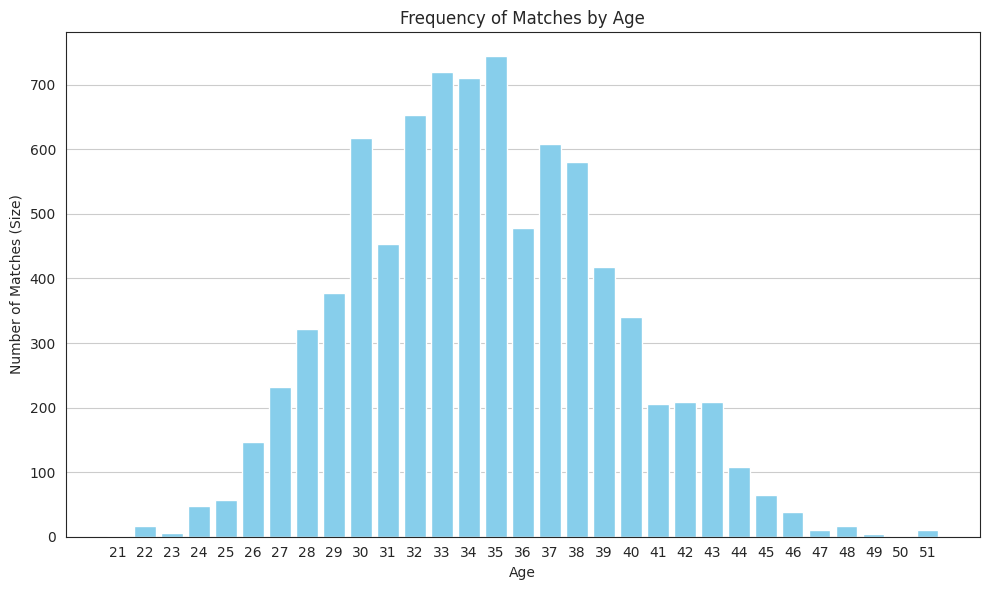

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(age_group['age'], age_group['size'], color='skyblue')
plt.title('Frequency of Matches by Age')
plt.xlabel('Age')
plt.ylabel('Number of Matches (Size)')
plt.xticks(range(int(age_group['age'].min()), int(age_group['age'].max()) + 1))  # Set x ticks to show every age
plt.grid(axis='y')  # Add horizontal grid lines
plt.tight_layout()  # Adjust the layout
plt.show()


# **We look at other metrics such as takedowns landed per age group and take downs defended per age group**

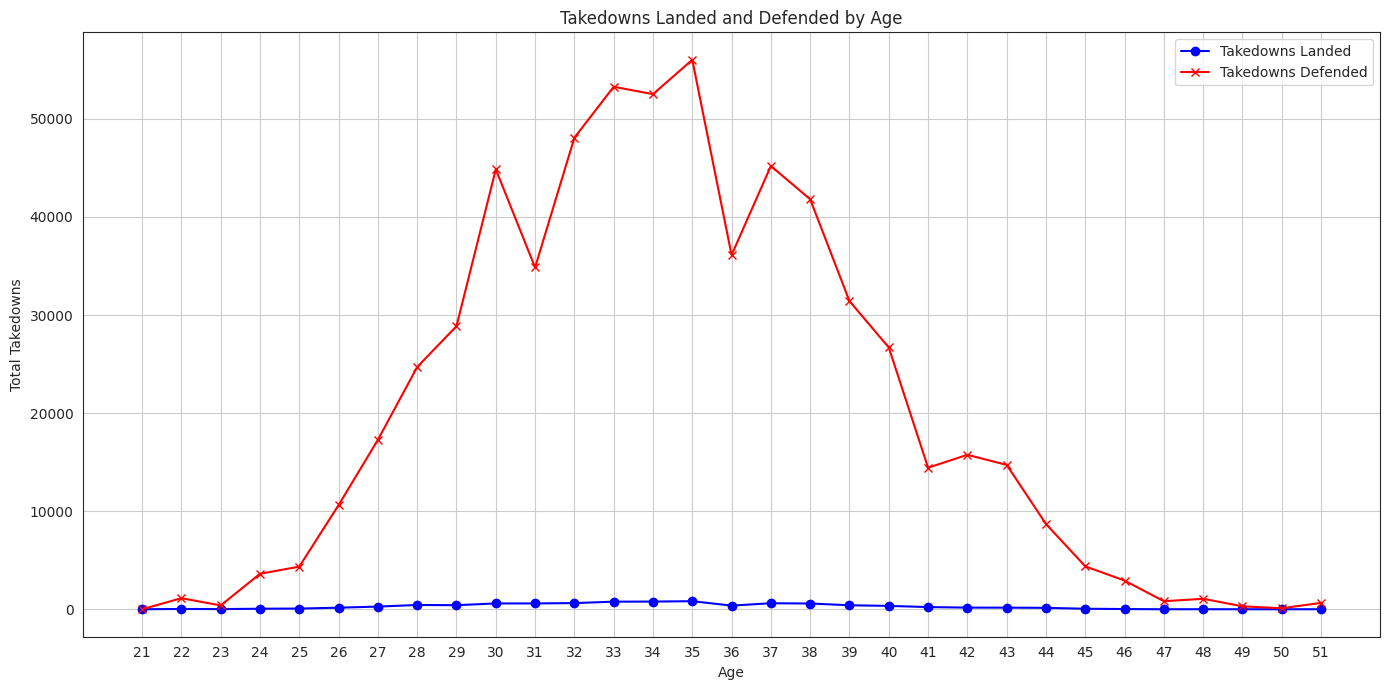

In [231]:
significant_strikes_data=temp_df[['age','takedowns_landed','takedowns_def']]
sig_data= significant_strikes_data.groupby('age').sum().reset_index()
# sig_data.head()
sig_data = sig_data.loc[:, ~sig_data.columns.duplicated()]
plt.figure(figsize=(14, 7))
plt.plot(sig_data['age'], sig_data['takedowns_landed'], label='Takedowns Landed', marker='o', color='blue')
plt.plot(sig_data['age'], sig_data['takedowns_def'], label='Takedowns Defended', marker='x', color='red')


plt.title('Takedowns Landed and Defended by Age')
plt.xlabel('Age')
plt.ylabel('Total Takedowns')
plt.legend()
plt.grid(True)

plt.xticks(range(int(sig_data['age'].min()), int(sig_data['age'].max()) + 1))

plt.tight_layout()
plt.show()


**Peak Activity: The number of "Takedowns Defended" seems to peak around the age range of early to mid-30s, which might suggest that fighters in this age range are more active or more matches are recorded for them, thus they engage in more takedown defense.**

**Takedowns Landed: The "Takedowns Landed" count is much lower across all age groups compared to "Takedowns Defended." This could imply that takedowns are harder to achieve or less frequent in matches. The trend also seems relatively flat, indicating no strong correlation with age.**

**Possible Prime Age: If we interpret higher activity (more defended takedowns) as a sign of prime age, then the prime age range based on this metric appears to be in the early to mid-30s. This is when fighters are most frequently defending against takedowns.**

**Decline After Prime: There is a sharp decline in "Takedowns Defended" after this peak, which could suggest that fighters either retire, have fewer fights, or perhaps become less effective at takedown defense as they age.**

# **We look at other metrics such as total strikes landed per age group and total strikes defended per age group**

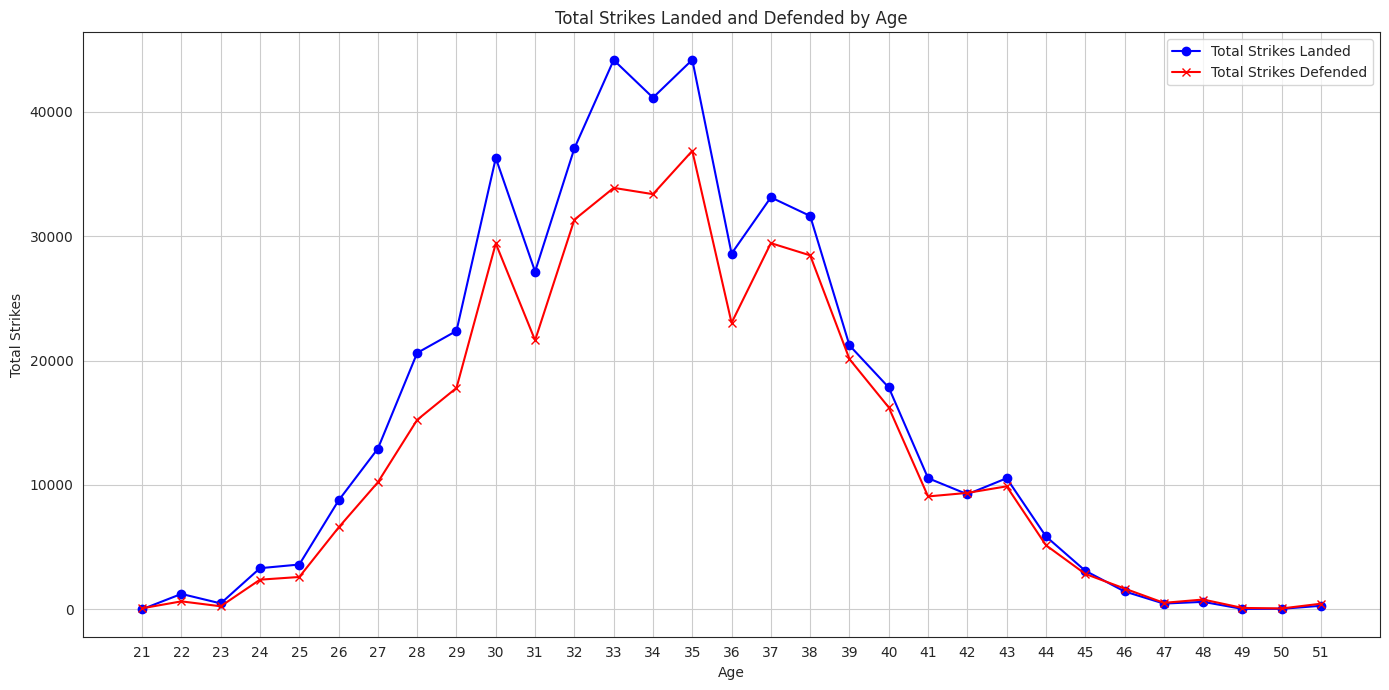

In [221]:
strikes_df = temp_df[['age', 'total_strikes_landed', 'total_strikes_def']]
age_strikes = strikes_df.groupby('age').sum().reset_index()
age_strikes = age_strikes.loc[:, ~age_strikes.columns.duplicated()]
plt.figure(figsize=(14, 7))
plt.plot(age_strikes['age'], age_strikes['total_strikes_landed'], label='Total Strikes Landed', marker='o', color='blue')
plt.plot(age_strikes['age'], age_strikes['total_strikes_def'], label='Total Strikes Defended', marker='x', color='red')


plt.title('Total Strikes Landed and Defended by Age')
plt.xlabel('Age')
plt.ylabel('Total Strikes')
plt.legend()
plt.grid(True)

plt.xticks(range(int(age_strikes['age'].min()), int(age_strikes['age'].max()) + 1))

plt.tight_layout()
plt.show()


**Activity Peak: Similar to takedowns, there seems to be a peak in activity, both in strikes landed and strikes defended, which occurs in the early to mid-30s. This suggests that fighters in this age range are likely at their most active in terms of striking.**

**Correlation Between Landed and Defended: The trends of both strikes landed and strikes defended follow a similar pattern, with rises and falls occurring in tandem. This could indicate that as fighters age and gain experience, they become better both offensively and defensively up to a certain point.****

**Potential Prime Age: If one interprets the peak in strikes landed as an indicator of prime offensive capabilities, and the peak in strikes defended as an indicator of prime defensive capabilities, then the prime age range for fighters based on these metrics also appears to be in the early to mid-30s.**